In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rithesh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
from nltk.corpus import stopwords
from nltk import word_tokenize

In [11]:
df = pd.read_csv('doctorReviews.csv')

In [12]:
df = df.iloc[:, 1:3]

In [13]:
df

,reviews,labels
0,he explained initially that it takes 4-5 sitin...,0
1,great dr definitely recommend he recommends le...,1
2,doctor came and spent 9 seconds and recommende...,0
3,i am completely satisfied with the consultatio...,1
4,my experience was nice dr dyed was cool and co...,1
...,...,...
138,dr is not ready to talk he writes for test and...,0
139,doc just spent 3-5 minutes time to review on f...,0
140,very friendly and his approach is also very go...,1
141,overall had a very bad experience and the hosp...,0


In [14]:
vc_df = pd.DataFrame(df['labels'].value_counts()).reset_index()
vc_df.columns = ['Sentiment', 'Count'] 
vc_df['Sentiment'] = vc_df['Sentiment'].map({1 : 'Positive', 0: 'Negative'}) 
vc_df

,Sentiment,Count
0,Negative,72
1,Positive,71


#### 1. Replacing punctuation with space

In [15]:
df["reviews"] = df["reviews"].str.replace("[^a-zA-Z0-9#']", " ") 

C:\Users\Rithesh\AppData\Local\Temp\ipykernel_11232\1084315776.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["reviews"] = df["reviews"].str.replace("[^a-zA-Z0-9#']", " ")


In [16]:
df.head(5)

,reviews,labels
0,he explained initially that it takes 4 5 sitin...,0
1,great dr definitely recommend he recommends le...,1
2,doctor came and spent 9 seconds and recommende...,0
3,i am completely satisfied with the consultatio...,1
4,my experience was nice dr dyed was cool and co...,1


#### 2. Removing short words

In [17]:
df['reviews'] = df['reviews'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

In [18]:
df.head(5)

,reviews,labels
0,explained initially that takes sitings and its...,0
1,great definitely recommend recommends less med...,1
2,doctor came and spent seconds and recommended ...,0
3,completely satisfied with the consultation hav...,1
4,experience was nice dyed was cool and compose ...,1


 #### 3. Make everything lowercase

In [19]:
df['reviews'] = [review.lower() for review in df['reviews']]

In [20]:
df.head(5)

,reviews,labels
0,explained initially that takes sitings and its...,0
1,great definitely recommend recommends less med...,1
2,doctor came and spent seconds and recommended ...,0
3,completely satisfied with the consultation hav...,1
4,experience was nice dyed was cool and compose ...,1


#### 4. Remove stop words like a, an, they etc.

In [21]:
stop_words = stopwords.words('english')
add_words = ['doctor']
stop_words.extend(add_words)

In [22]:
stop_words[0:10] #sample

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [23]:
def remove_stopwords(rev):
    review_tokenized = word_tokenize(rev)
    rev_new = " ".join([i for i in review_tokenized  if i not in stop_words])
    return rev_new

df['reviews'] = [remove_stopwords(r) for r in df['reviews']]

In [24]:
df.head(5)

,reviews,labels
0,explained initially takes sitings total treatm...,0
1,great definitely recommend recommends less med...,1
2,came spent seconds recommended nose throat end...,0
3,completely satisfied consultation acute severe...,1
4,experience nice dyed cool compose patiently li...,1


#### 5. Lemmatization 

In [25]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Rithesh\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [26]:
lemmatizer = WordNetLemmatizer()

In [27]:
def nltkwordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

def lemmatize(sentence):
    nltk_tagged = nltk.pos_tag(word_tokenize(sentence))  
    wordnet_tagged = map(lambda x: (x[0], nltkwordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            lemmatized_sentence.append(word)
        else:        
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)


df['reviews'] = df['reviews'].apply(lambda x: lemmatize(x))

In [28]:
df.head(10)

,reviews,labels
0,explain initially take sitings total treatment...,0
1,great definitely recommend recommend less medi...,1
2,come spent second recommend nose throat endosc...,0
3,completely satisfied consultation acute severe...,1
4,experience nice dye cool compose patiently lis...,1
5,serious explain medical condition mother repor...,0
6,experience friendly 's day since start medicin...,1
7,friendly decent explanation illness medicine u...,1
8,price way treat patient perfect strongly recom...,1
9,available time need improve availability emerg...,0


In [30]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

cv = CountVectorizer(max_features = 1000)
X = cv.fit_transform(df.reviews).toarray()
y = df.labels.values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [31]:
from sklearn.naive_bayes import GaussianNB

classifierNB = GaussianNB()
classifierNB.fit(X_train, y_train)

y_pred = classifierNB.predict(X_test)

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score

accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print("The model accuracy is", accuracy )

The model accuracy is 0.6976744186046512


<Axes: >

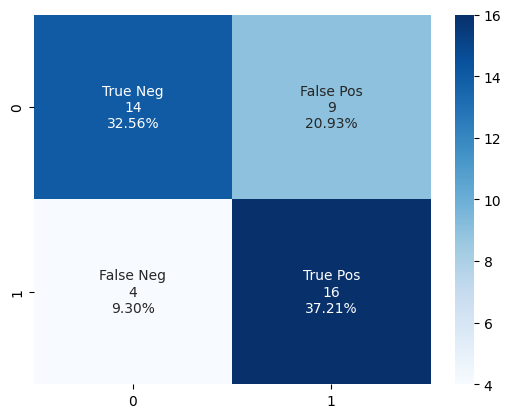

In [36]:
import seaborn as sns

group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')

In [37]:
from sklearn import svm

classifierSVM = svm.SVC(kernel='sigmoid')
classifierSVM.fit(X_train, y_train)

y_pred = classifierSVM.predict(X_test)

In [38]:
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print("The model accuracy is", accuracy )

The model accuracy is 0.813953488372093


<Axes: >

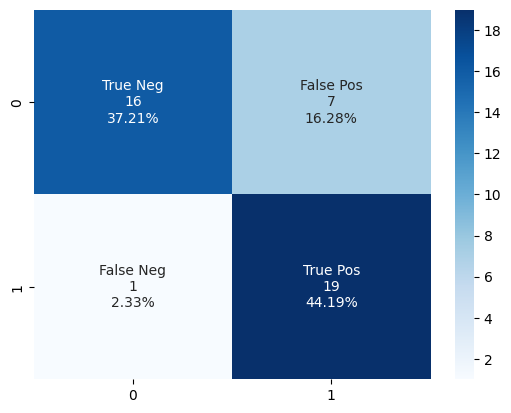

In [39]:
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')